# TMA01, question 2 (60 marks)

**Name**: Mark Carroll

**PI**: F3189581

This TMA question gives you the opportunity to demonstrate your mastery of the techniques in carrying out a small-scale data analysis. Specifically, this question requires you to clean two datasets, combine and reshape them, and graphically present the cleaned data. All the techniques required to answer this question can be found in Parts 2-6, and are illustrated in the associated notebooks.

### The task

In this question, you will investigate two datasets, one which details the urban and rural populations of areas of the United Kingdom, and one which details the number of conditional cautions given in different areas of the UK. The aim is to explore the number of conditional cautions given by the police, according to the urban and rural populations of England and Wales.

You should obtain the data on conditional cautions from the National Archive via the URL:

http://webarchive.nationalarchives.gov.uk/20160701144433/https://www.cps.gov.uk/data/conditional_cautioning/index.html

You should find the data on conditional cautioning *specifically for the period 2010-2011*.

You should use the census data from the 2011 census to find the rural and urban population of counties in England:

https://data.gov.uk/dataset/ed3ea343-4e92-4e16-a70d-2b8fd5da3d27/rural-urban-classification-2011-of-counties-in-england

** You must produce a graphical representation of the number of conditional cautions given in each of the different counties of England and Wales, according to the rural and urban populations of those counties. You should then discuss what you believe your representation shows. **

*(60 marks)*


### Some guidance

There are many ways you could approach this task, but one way might be to produce a pandas dataframe, containing the values so that for the urban and rural populations of each county in the datasets, the number of cautions given in the 2010-2011 period is listed. The final dataframe could look something like this:


|Rural Population|Urban Population|Conditional Cautions|
|---|---|---|
|134847 | 45892 | 12 |
|94781 | 213119 | 12 |
|83722 | 92742 | 1 |
|121445 | 77443 | 1 |
| $\vdots$ | $\vdots$ | $\vdots$ |

(although note that the figures 134847, 45892, 12, ... are just for illustration; they are not necessarily the correct values for the question).

You should then construct one or more plots showing the relationships between the size of the rural population, the size of the urban population and the number of conditional cautions in this period. You should also give an explanation of what you believe your plot shows.

It is crucial for this question to bear in mind that at each stage, you must describe what you have done in sufficient detail that someone could replicate your work. This means that you must:

* explain what any code that you have written does, and execute it in the body of your submitted notebook,

* identify the licenses governing the data you use, and the specific clauses in the licenses that permit their use,

* where you have used tools that are not accessed via python or the notebooks (such as OpenRefine), you should include some screenshots to show what you did, and to help the marker understand your processes,

* clearly explain any assumptions or simplifications that you have made about the data, and

* interpret your final results in the context of these assumptions and simplifications.

Note that, unlike question 1 of this TMA, you do not have to use python to carry out your analyses. However, as stated 
above, if you do not use python, you should provide screenshots of the tools you did use in order to show your working.


Some guidance on presentation:

* You must present your answer in this notebook.
    
* Do not put too much text or code into each notebook cell. Text or markdown cells should contain one or two paragraphs at most, code cells should not contain more than about ten lines of python.

* Ensure that in your code, you use meaningful variable names.

* You should have a specific cell whose return value is the dataframe described above.

* You should have a specific cell which plots the data in the dataframe.

### Structuring your answer

This question requires that you complete a number of tasks:

1. You should check the licences for the datasets, and explain why you are permitted to carry out your chosen analysis.

2. You need to import the two datasets.

3. You must examine and clean the datasets to allow you to carry out the visualisation. You should consider questions such as:

    * Is there ambiguity in the dataset? (That is, are there aspects of the data which are unclear, and not documented?)
    
    * Is any data missing from the datasets?
    
    * Is there any dirtiness in the datasets, or inconsistency in how the data is represented between the two datasets?
    
    In each of these cases, you should show whether or not the given problem with the data exists, and if so, how you have handled it.

4. You will need to capture the data in a dataframe in the form described above.

5. Finally, you should select a visualisation method for the data in the dataset, and present a plot of the data, with a description of how you think it should be interpreted. We are not prescribing a particular choice of visualisation: you should choose one that you think is appropriate.


We have provided a structure for your answer. The headings do not represent equal amounts of work, because different datasets and different tasks require the effort to be spent in different places. Also, you may need to use several cells to address a particular heading. For example, you would expect to present substantially more work on identifying and handling the missing data, than on importing the datasets. 

### Your answer

#### 1. Identify licensing terms and conditions


The conditional cautions data is made available for use under the Open government licence 2.0 Via Crown Copyright allowing us to reuse the information free of charge and encouraging links to the website which are included above as well as at the end of my interpretation.

The census data for 2011 is available for use under the open government licence 3.0 which allows us to copy, publish, distribute, transmit, adapt and exploit the information as long as we acknowledge the source of the data which is liked above and also credited at the end of my interpretation<span class="mark">&#10004;</span>


#### 2. Import the two datasets

In [2]:
## import the imports
import pandas as pd
import numpy as np
import re
import glob
import matplotlib.pyplot as plt

In [3]:
## check file names in the folder
!ls -l data/

total 124
-rwxrwxrwx 1 oustudent users 29172 Dec 13 19:25 hop_mps.csv
-rwxrwxrwx 1 oustudent users  1722 Dec 13 19:25 Q1_10-11_Cond_Caut_No_Administered.csv
-rwxrwxrwx 1 oustudent users  1708 Dec 13 19:25 Q2_10-11_Cond_Caut_No_Administered.csv
-rwxrwxrwx 1 oustudent users  1703 Dec 13 19:25 Q3_10-11_Cond_Caut_No_Administered.csv
-rwxrwxrwx 1 oustudent users  1463 Dec 13 19:25 Q4_10-11_Cond_Caut_post_charge.csv
-rwxrwxrwx 1 oustudent users  1694 Dec 13 19:25 Q4_10-11_Cond_Caut_pre_charge.csv
-rwxrwxrwx 1 oustudent users  4714 Dec 13 19:25 Rur_Urb_Class_2011_of_Ctys_in_England.csv
-rwxrwxrwx 1 oustudent users 31771 Dec 13 19:25 wiki_new.csv
-rwxrwxrwx 1 oustudent users 31241 Dec 13 19:25 wikipedia_mps.csv


In [4]:
## check thge format of the csv files
!head -n 5 'data/Q1_10-11_Conditional_Cautions_No_Administered.csv'

head: cannot open 'data/Q1_10-11_Conditional_Cautions_No_Administered.csv' for reading: No such file or directory


In [5]:
##load the csv files into the datasets
CCQ1 = pd.read_csv('data/Q1_10-11_Cond_Caut_No_Administered.csv', encoding="utf-8")
CCQ2 = pd.read_csv('data/Q2_10-11_Cond_Caut_No_Administered.csv', encoding="utf-8")
CCQ3 = pd.read_csv('data/Q3_10-11_Cond_Caut_No_Administered.csv', encoding="utf-8")
CCQ4PR = pd.read_csv('data/Q4_10-11_Cond_Caut_pre_charge.csv', encoding="utf-8")
CCQ4PO = pd.read_csv('data/Q4_10-11_Cond_Caut_post_charge.csv', encoding="utf-8")

In [6]:
## diferentiate the pre and post colums in respective datasets
CCQ4PO =CCQ4PO.rename(columns={'Q4 2010/2011' : 'Q4 2010/2011 Post'})
CCQ4PR = CCQ4PR.rename(columns={'Q4 2010/2011' : 'Q4 2010/2011 Pre'})

In [7]:
CCQ1[:3]

,Area,Current Quarter Month 1,Current Quarter Month 2,Current Quarter Month 3,Q1 2010/2011,Previous Quarter Month 1,Previous Quarter Month 2,Previous Quarter Month 3,Q1 2009/2010
0,Avon & Somerset,22,15,16,53,24,34,34,92
1,Bedfordshire,11,10,9,30,7,7,7,21
2,British Transport Police,4,7,4,15,7,12,12,31


In [8]:
## strip the pertinent data out of all the dtatsets and combine into the one used for the study
cond_caut_2010_11 = pd.concat([CCQ1['Area '],CCQ1['Q1 2010/2011'],CCQ2['Q2 2010/2011'],CCQ3['Q3 2010/2011'],CCQ4PR['Q4 2010/2011 Pre'],CCQ4PO['Q4 2010/2011 Post']], axis=1, keys=['Area','Q1 2010/2011','Q2 2010/2011','Q3 2010/2011','Q4 2010/2011 Pre','Q4 2010/2011 Post'])

In [9]:
## index on Area
cond_caut_2010_11.set_index('Area', inplace=True)

<div class="mark">
It's a good idea to test each step as you you</div><i class="fa fa-lightbulb-o "></i>

In [10]:
# Charly says
cond_caut_2010_11 [:5]


,Q1 2010/2011,Q2 2010/2011,Q3 2010/2011,Q4 2010/2011 Pre,Q4 2010/2011 Post
Area,,,,,
Avon & Somerset,53,61,56,45,0
Bedfordshire,30,42,50,42,0
British Transport Police,15,25,26,22,6
Cambridgeshire,104,133,125,96,11
Cheshire,42,39,31,30,4


In [11]:
## load census csv data into a datset
rural_urban_2011 = pd.read_csv('data/Rur_Urb_Class_2011_of_Ctyses_in_England.csv', encoding="utf-8")

FileNotFoundError: File b'data/Rur_Urb_Class_2011_of_Ctyses_in_England.csv' does not exist

<div class="mark">
There is a spelling error in the file name</div><i class="fa fa-lightbulb-o "></i>

In [10]:
# Charly says:
rural_urban_2011 = pd.read_csv('data/Rur_Urb_Class_2011_of_Ctys_in_England.csv', encoding="utf-8")


In [12]:
rural_urban_2011[:3]

,CTY11CD,CTYNM,Total_Rural_population_2011,Urban_City_and_Town_population_2011,Urban_Minor_Conurbation_population_2011,Urban_Major_Conurbation_population_2011,Total_Urban_population_2011,Total_population_2011,Hub_towns_rural_related_population_included_in_Urban_population_2011,Rural_including_hub_towns_rural_&_rural_related_population_2011,Rural_including_hub_towns_rural_&_rural_related_population_as_%_of_Total_population_2011,RUC11CD,RUC11,Broad_RUC11,OBJECTID
0,E10000002,Buckinghamshire,165740,338097,0,1446,339543,505283,30969,196709,38.93,3,Urban with Significant Rural (rural including ...,Urban with Significant Rural,0
1,E10000003,Cambridgeshire,292633,328577,0,0,328577,621210,108782,401415,64.61,2,Largely Rural (rural including hub towns 50-79%),Predominantly Rural,1
2,E10000006,Cumbria,267819,232039,0,0,232039,499858,107704,375523,75.12,2,Largely Rural (rural including hub towns 50-79%),Predominantly Rural,2


In [13]:
##trim out uneccesary data
rural_urban_2011 = rural_urban_2011[['CTYNM','Total_Rural_population_2011','Total_Urban_population_2011','Total_population_2011']]

In [14]:
##make the county name the index
rural_urban_2011.set_index('CTYNM', inplace=True)

#### 3. Identify and handle ambiguity and vagueness


When obtaining the data, it was found that the q4 data had been split into two values these where added as separate columns and the total includes both values. Furthermore, an investigation into the Constabularies found that some included multiple counties. Therefore, these should be merged and be renamed to allow them to be merged with the constabularies data frame. Furthermore, in the initial loading of the data frames, the pre charge and post-charge caution numbers for the fourth quarter were renamed to avoid naming conflicts as well as the quarterly data being merged into its data frame.<span class="mark">&#10004; Good, but are here any risks in doing any of this? Do the following mergers of counties exactly match the police areas? </span></div>

In [15]:
## merge and rename rows to the correct constabulary names
## Thames valley
rural_urban_2011.loc['Buckinghamshire'] += rural_urban_2011.loc['Oxfordshire']
rural_urban_2011.drop(['Oxfordshire'], inplace=True)
rural_urban_2011.rename(index={'Buckinghamshire':'Thames Valley'},inplace=True)

In [16]:
## Avon & Somerset
rural_urban_2011.rename(index={'Somerset':'Avon & Somerset'},inplace=True)

In [17]:
## Devon and cornwall
rural_urban_2011.rename(index={'Devon':'Devon and Cornwall'},inplace=True)

In [18]:
## Sussex
rural_urban_2011.loc['East Sussex'] += rural_urban_2011.loc['West Sussex']
rural_urban_2011.drop(['West Sussex'], inplace=True)
rural_urban_2011.rename(index={'East Sussex':'Sussex'},inplace=True)

In [19]:
## West Mercia
rural_urban_2011.rename(index={'Worcestershire':'West Mercia'},inplace=True)

In [20]:
## reorder the dataframe alphabetically
rural_urban_2011.sort_index(axis=0,inplace=True)

<div class="mark">
It's always a good idea to check the output</div><i class="fa fa-lightbulb-o "></i>

In [29]:
# Charly says
rural_urban_2011 [:5]

,Total_Rural_population_2011,Total_Urban_population_2011,Total_population_2011
CTYNM,,,
Cambridgeshire,292633,328577,621210
Cumbria,267819,232039,499858
Derbyshire,208184,561502,769686
Dorset,168577,244328,412905
Essex,360605,1032982,1393587


#### 4. Identify and handle missing data

The conditional caution data does not have a total cautions column therefore one should be created <span class="mark">OK but that's nothing to do with missing data, just the way you see it</span>

In [21]:
## add a total column to conditional caution dataframe
cond_caut_2010_11['Cautions_2010_11'] = cond_caut_2010_11.apply(lambda row: row['Q1 2010/2011']+row['Q2 2010/2011']+row['Q3 2010/2011']+row['Q4 2010/2011 Pre']+row['Q4 2010/2011 Post'], axis=1)

#### 5. Identify and handle inconsistent or dirty data

While some constabularies where made up of multiple counties not all of them had all of their constituent counties therefore these should be removed as the data will be erronios due to incomplete population numbers

In [22]:
## drop constabularies with incomplete population data
rural_urban_2011.drop(['West Mercia'], inplace = True)
rural_urban_2011.drop(['Thames Valley'], inplace = True)
rural_urban_2011.drop(['Devon and Cornwall'], inplace = True)
rural_urban_2011.drop(['Avon & Somerset'], inplace = True)

<div class="mark">
OK, but these seems at odds with some of your decisions above. Fine to change your mind, of course. </div><i class="fa fa-lightbulb-o "></i>

#### 6. Put the data into an appropriate form for plotting

In [23]:
## creatying plot data using an inner join based on the index of both data fields leaving only population and total cautions
plot_df= pd.concat([rural_urban_2011, cond_caut_2010_11['Cautions_2010_11']], axis=1, join='inner')

In [24]:
## review datafram to ensure the data is complete
plot_df

,Total_Rural_population_2011,Total_Urban_population_2011,Total_population_2011,Cautions_2010_11
Cambridgeshire,292633,328577,621210,469
Cumbria,267819,232039,499858,152
Derbyshire,208184,561502,769686,54
Dorset,168577,244328,412905,158
Essex,360605,1032982,1393587,217
Gloucestershire,177017,419967,596984,16
Hertfordshire,128584,987478,1116062,222
Kent,405100,1058640,1463740,223
Lancashire,241710,929629,1171339,445
Leicestershire,198576,451913,650489,91


#### 7. Visualise the data

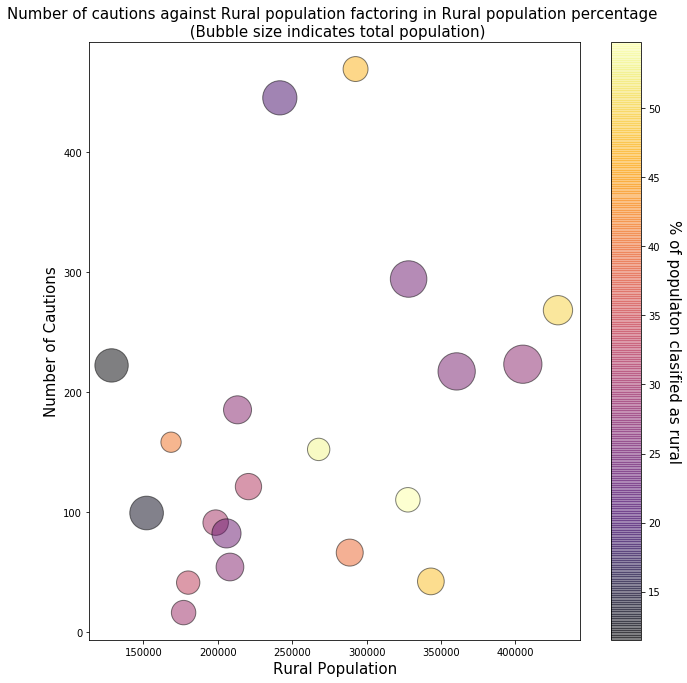

In [25]:
fig = plt.figure(figsize=[11,11])
plt.scatter(plot_df['Total_Rural_population_2011'],
            plot_df['Cautions_2010_11'],
            alpha=0.5,
            edgecolors="black",
            linewidth=1,
            s =(plot_df['Total_population_2011']/1000),
            c = plot_df['Total_Rural_population_2011']/plot_df['Total_population_2011']*100, 
            cmap='inferno')
plt.title('Number of cautions against Rural population factoring in Rural population percentage \n (Bubble size indicates total population)').set_fontsize(15)
plt.ylabel('Number of Cautions').set_fontsize(15)
plt.xlabel('Rural Population').set_fontsize(15)
plt.colorbar().set_label('% of populaton clasified as rural', rotation = 270, labelpad=20, fontsize = 15)
plt.show()

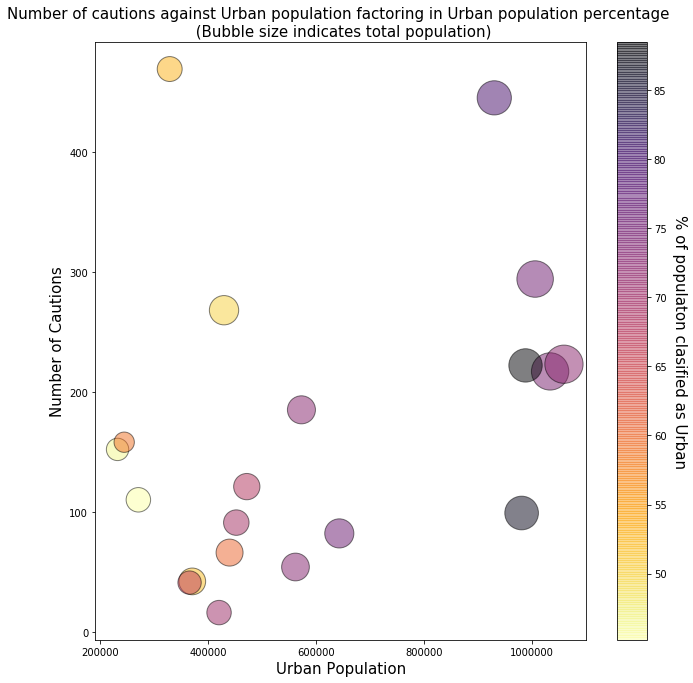

In [26]:
fig = plt.figure(figsize=[11,11])
plt.scatter(plot_df['Total_Urban_population_2011'],
            plot_df['Cautions_2010_11'],
            alpha=0.5,
            edgecolors="black",
            linewidth=1,
            s =(plot_df['Total_population_2011']/1000),
            c = plot_df['Total_Urban_population_2011']/plot_df['Total_population_2011']*100, 
            cmap='inferno_r')
plt.title('Number of cautions against Urban population factoring in Urban population percentage \n (Bubble size indicates total population)').set_fontsize(15)
plt.ylabel('Number of Cautions').set_fontsize(15)
plt.xlabel('Urban Population').set_fontsize(15)
plt.colorbar().set_label('% of populaton clasified as Urban', rotation = 270, labelpad=20, fontsize = 15)
plt.show()

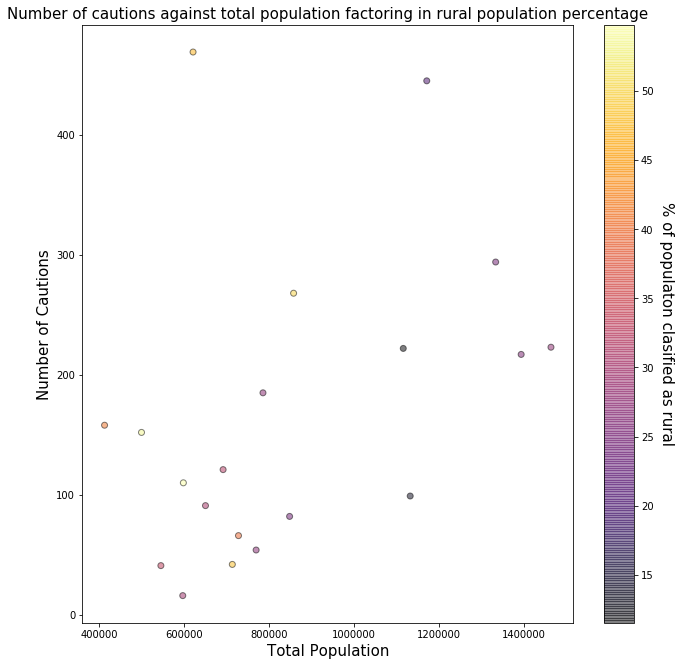

In [27]:
fig = plt.figure(figsize=[11,11])
plt.scatter(plot_df['Total_population_2011'],
            plot_df['Cautions_2010_11'],
            alpha=0.5,
            edgecolors="black",
            linewidth=1,
            c = plot_df['Total_Rural_population_2011']/plot_df['Total_population_2011']*100, 
            cmap='inferno')
plt.title('Number of cautions against total population factoring in rural population percentage').set_fontsize(15)
plt.ylabel('Number of Cautions').set_fontsize(15)
plt.xlabel('Total Population').set_fontsize(15)
plt.colorbar().set_label('% of populaton clasified as rural', rotation = 270, labelpad=20, fontsize = 15)
plt.show()

<div class="mark">
Bubble plot is a good idea. Did you think about making the cautions drive the bubble diameter? Or adding Area labels to the bubble? </div><i class="fa fa-lightbulb-o "></i>

#### 8. Interpret your plot

Note should be taken that the data used in this study is based on data taken from twenty constabularies out of the forty-two in England and Wales due to population data on the census for the year studied (2011) being either incomplete or missing.<span class="mark">&#10004;</span>

Reviewing the visualisations for the occurrence of conditional cautions in regards to differing rural and urban population densities it is clear that as overall population increases the number of conditional cautions increases.  <span class="mark">Well, it would be surprising if it didn't. Although what did you make of the data for Cambridgeshire?</span> 

On the first graph it can be seen that populations with a higher rural percentage of the population have a higher incidence of conditional cautions in comparison to these areas with a higher concentration of Urban population when directly comparing the total population of these areas <span class="mark">Can it? How clearly?</span> 

This observation is confirmed in the second graph where the number of cautions is compared to the urban population as this clearly shows that comparably sized population with a lower incidence of urban population having a higher quantity of conditional cautions. <span class="mark">In the next part of the module we will look at objective ways of measuring correlation</span>

The last graph shows that the general range and quantity of conditional cautions increases as population does it also continues to illustrate the more rural areas having a greater share of the conditional cautions for comparable total population sizes. 

In order to construct this analysis I followed the
advice of Thomson (2018) to state my assumptions and the
limitations of my observations.

Conditional caution data obtained from: https://webarchive.nationalarchives.gov.uk/20160701144433/https://www.cps.gov.uk/data/conditional_cautioning/index.html

Population data obtained from: 
https://data.gov.uk/dataset/ed3ea343-4e92-4e16-a70d-2b8fd5da3d27/rural-urban-classification-2011-of-counties-in-england

#### References

Thomson, <span class="burk">S.</span> (2018). TM351 : TMA01 Preparation [tutorial to
TM351], TM351: Data management and analysis. Open
University. October. <span class="mark">Good. I suspect this was Chris T.</span> 


<div class="mark">
Overall, this is a very good attempt to understand the data. I'm not sure where the error in the filename at an early stage (Step 4)  arose, but plainly the rest of the code would not work until this was fixed.
    
Overall, you used pandas effectively and came up with pragmatic ways to handle ambiguous, dirty and missing data. You provided a clear narrative so that I could follow your process and all the necessary code to reproduce your working. 

Well done, Mark. 46/60
</div>